# MINI PROJECT(190819)
## CIFAR-10 분류하기

In [1]:
# need library
import numpy as np
import tensorflow as tf

# keras
from keras.models import Sequential
from keras.layers import Dense

# warning remove
if type(tf.contrib) != type(tf):
    tf.contrib._warning = None

Using TensorFlow backend.


In [2]:
# 데이터 전처리
from keras.datasets import cifar10
(X_train, y_train0), (X_test, y_test0) = cifar10.load_data()
print(X_train.shape, X_train.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test.shape, X_test.dtype)
print(y_test0.shape, y_test0.dtype)

(50000, 32, 32, 3) uint8
(50000, 1) uint8
(10000, 32, 32, 3) uint8
(10000, 1) int32


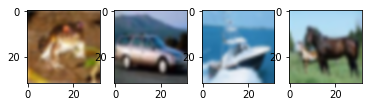

In [3]:
# 데이터 확인
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

In [4]:
# 데이터 변환 및 정규화
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
print(X_train.shape, X_train.dtype)
print(X_test.shape, X_test.dtype)

(50000, 32, 32, 3) float32
(10000, 32, 32, 3) float32


In [5]:
# one-hot-encoding
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
# modeling
import os
import sys

# keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

In [7]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [8]:
# 컨볼루션 신경망의 설정
model = Sequential()

W0820 10:54:32.456732  4512 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [9]:
# 마스크 갯수, 마스크의 크기, 입력되는 값 및 색상, 활성화 함수
model.add(Conv2D(64, kernel_size=(5, 5), input_shape=(32, 32, 3), padding='same', activation='relu'))

W0820 10:54:40.373284  4512 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0820 10:54:40.388884  4512 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [10]:
# input_shape=(행, 열, 색상(3) 또는 흑백(1))
model.add(Conv2D(64, kernel_size=(5, 5), padding='same', activation='softplus'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu')) 
model.add(Conv2D(64, kernel_size=(5, 5), padding='same', activation='softplus'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Dropout(0.25)) 
model.add(Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu')) 
model.add(Conv2D(64, kernel_size=(5, 5), padding='same', activation='softplus'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Dropout(0.25)) 
model.add(Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu')) 
model.add(Conv2D(64, kernel_size=(5, 5), padding='same', activation='softplus'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Dropout(0.25)) 
model.add(Flatten())
model.add(Dense(64,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

W0820 10:54:48.355460  4512 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0820 10:54:48.355460  4512 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0820 10:54:48.355460  4512 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        102464    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [11]:
# model compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0820 10:54:56.989018  4512 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0820 10:54:57.018619  4512 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [12]:
# 모델 최적화 설정
MODEL_DIR = 'model10//'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath="model10//{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=50)

In [13]:
# training
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=200, verbose=1, 
                    callbacks=[early_stopping_callback,checkpointer])

W0820 10:55:13.293743  4512 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 395s 8ms/step - loss: 2.3122 - acc: 0.0986 - val_loss: 2.3026 - val_acc: 0.1000

Epoch 00001: val_loss improved from inf to 2.30259, saving model to model10//01-2.3026.hdf5
Epoch 2/100
50000/50000 [==============================] - 387s 8ms/step - loss: 2.3028 - acc: 0.0983 - val_loss: 2.3026 - val_acc: 0.1000

Epoch 00002: val_loss improved from 2.30259 to 2.30259, saving model to model10//02-2.3026.hdf5
Epoch 3/100
50000/50000 [==============================] - 393s 8ms/step - loss: 2.3027 - acc: 0.0972 - val_loss: 2.3026 - val_acc: 0.1000

Epoch 00003: val_loss improved from 2.30259 to 2.30259, saving model to model10//03-2.3026.hdf5
Epoch 4/100
50000/50000 [==============================] - 401s 8ms/step - loss: 2.3027 - acc: 0.0985 - val_loss: 2.3026 - val_acc: 0.1000

Epoch 00004: val_loss improved from 2.30259 to 2.30259, saving model to model10//04-2.3026.hdf5
Epoch 5/10

50000/50000 [==============================] - 400s 8ms/step - loss: 2.3027 - acc: 0.0992 - val_loss: 2.3026 - val_acc: 0.1000

Epoch 00042: val_loss did not improve from 2.30259
Epoch 43/100
50000/50000 [==============================] - 394s 8ms/step - loss: 2.3027 - acc: 0.0987 - val_loss: 2.3026 - val_acc: 0.1000

Epoch 00043: val_loss did not improve from 2.30259
Epoch 44/100
50000/50000 [==============================] - 409s 8ms/step - loss: 2.3027 - acc: 0.0986 - val_loss: 2.3026 - val_acc: 0.1000

Epoch 00044: val_loss did not improve from 2.30259
Epoch 45/100
50000/50000 [==============================] - 391s 8ms/step - loss: 2.3027 - acc: 0.0974 - val_loss: 2.3026 - val_acc: 0.1000

Epoch 00045: val_loss did not improve from 2.30259
Epoch 46/100
50000/50000 [==============================] - 394s 8ms/step - loss: 2.3027 - acc: 0.0998 - val_loss: 2.3026 - val_acc: 0.1000

Epoch 00046: val_loss did not improve from 2.30259
Epoch 47/100
50000/50000 [===========================

50000/50000 [==============================] - 383s 8ms/step - loss: 2.3027 - acc: 0.0992 - val_loss: 2.3026 - val_acc: 0.1000

Epoch 00084: val_loss did not improve from 2.30259
Epoch 85/100
50000/50000 [==============================] - 385s 8ms/step - loss: 2.3027 - acc: 0.0967 - val_loss: 2.3026 - val_acc: 0.1000

Epoch 00085: val_loss did not improve from 2.30259
Epoch 86/100
50000/50000 [==============================] - 388s 8ms/step - loss: 2.3027 - acc: 0.0970 - val_loss: 2.3026 - val_acc: 0.1000

Epoch 00086: val_loss did not improve from 2.30259
Epoch 87/100
50000/50000 [==============================] - 383s 8ms/step - loss: 2.3027 - acc: 0.0970 - val_loss: 2.3026 - val_acc: 0.1000

Epoch 00087: val_loss did not improve from 2.30259
Epoch 88/100
50000/50000 [==============================] - 384s 8ms/step - loss: 2.3027 - acc: 0.0989 - val_loss: 2.3026 - val_acc: 0.1000

Epoch 00088: val_loss did not improve from 2.30259
Epoch 89/100
50000/50000 [===========================

In [15]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 14s 1ms/step

 Test Accuracy: 0.1000


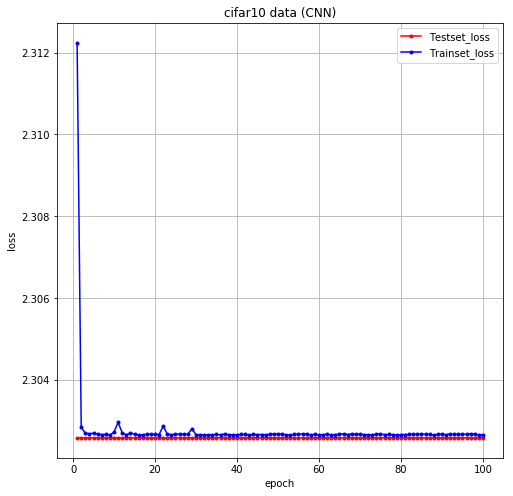

In [16]:
# 그래프 
import matplotlib.pyplot as plt
%matplotlib inline
y_vloss = history.history['val_loss'] # 검증셋으로 측정한 오차
y_loss = history.history['loss'] # 학습셋의 오차
x_len = np.arange(1,len(y_loss)+1)

plt.figure(figsize=(8,8))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('cifar10 data (CNN)')
plt.show()